In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data= pd.read_csv('./data/mall_customers.csv')
display(data.head(5))

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.rename({'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Spending Score'}, inplace=True, axis=1)
display(data.head(5))

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


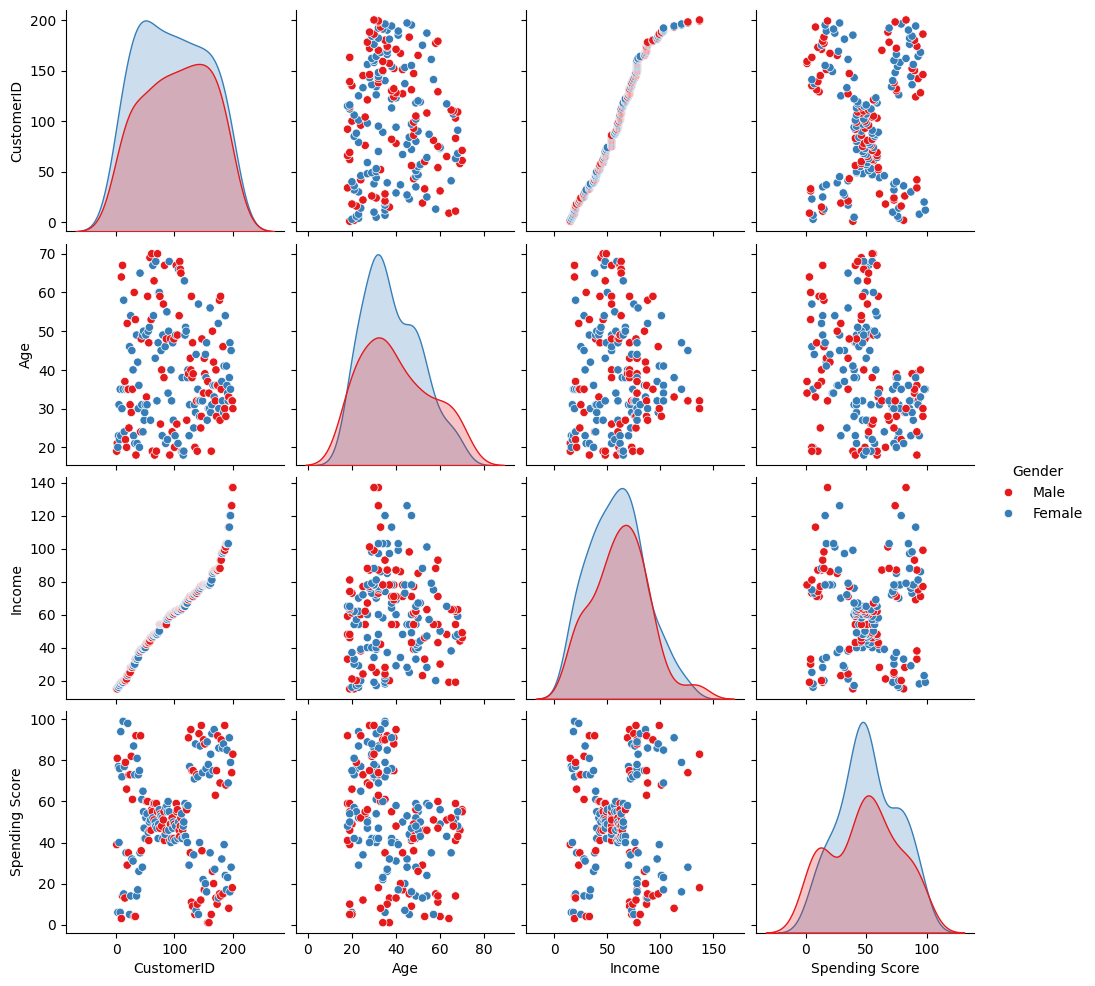

In [7]:
sns.pairplot(data, hue='Gender', palette='Set1')

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = data[['Income', 'Spending Score']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
kmeans = KMeans(n_clusters=5, n_init=10,  random_state=0)
kmeans.fit(X_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

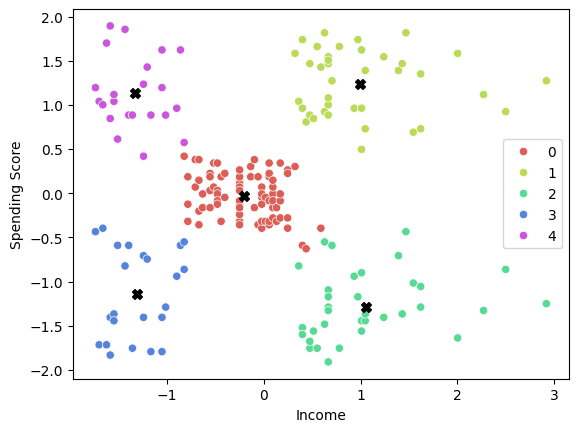

In [15]:
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette=sns.color_palette('hls',5), legend='full')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.scatter(centroids[:, 0], centroids[:, 1], s=50, color='k', marker='X')

Text(0.5, 0, 'Número de clusters')

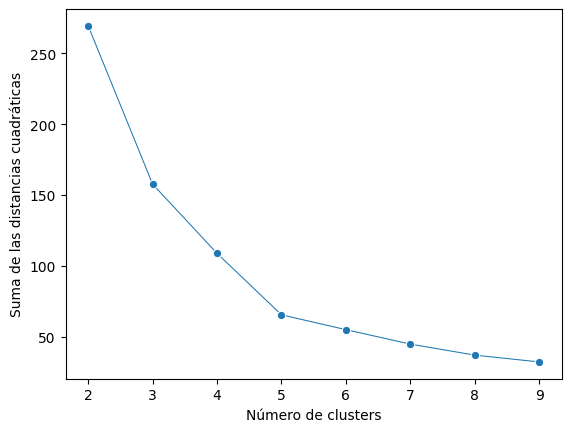

In [16]:
sq_distances = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    sq_distances.append(kmeans.inertia_)

sns.lineplot(x=k_values, y=sq_distances, marker='o', size=30, legend=False)
plt.ylabel('Suma de las distancias cuadráticas')
plt.xlabel('Número de clusters')

Text(0.5, 0, 'Número de clusters')

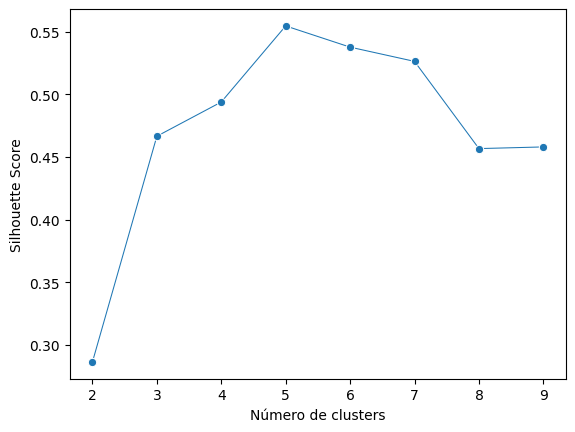

In [17]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

sil = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values, y=sil, marker='o', size=30, legend=False)
plt.ylabel('Silhouette Score')
plt.xlabel('Número de clusters')